## 🟠**FASE V: unsupervised models**🟠

### 🔶K-Means--MODELS 

In [1]:
# Librerías básicas

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

import cupy, cudf, cuml
from cuml.cluster import KMeans

monopoly = cudf.read_parquet('../monopoly_cleaned_parquet')

In [3]:
monopoly.shape

(51121, 66)

In [4]:
monopoly.sample(10)

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
9035,160.0,0.0,13.0,42.0,595067.0,17.0,1.0,0.0,1.0,0.0,...,0.0,2962.583333,0.0,4021.583333,0.0,11714.833333,0.0,11723.166667,8951.916667,0.0
31631,220.0,1.0,13.0,25.0,739137.4,30.0,1.0,0.0,1.0,0.0,...,0.0,30207.666667,0.0,30768.583333,0.0,28351.250000,0.0,24927.416667,32706.750000,0.0
18877,170.0,0.0,13.0,33.0,916201.0,8.0,1.0,0.0,1.0,0.0,...,0.0,0.000000,0.0,31416.666667,0.0,75086.583333,0.0,76143.833333,12127.416667,0.0
29082,220.0,0.0,13.0,28.0,229544.4,13.0,1.0,0.0,0.0,0.0,...,0.0,97727.916667,0.0,22691.333333,0.0,31618.000000,0.0,37393.770833,90454.083333,0.0
26830,160.0,1.0,13.0,29.0,440749.0,21.0,1.0,0.0,0.0,0.0,...,0.0,24964.083333,0.0,34199.250000,0.0,26039.166667,0.0,349.166667,53281.500000,0.0
27819,201.0,0.0,13.0,33.0,1112865.0,107.0,0.0,1.0,1.0,0.0,...,0.0,132872.083333,0.0,100211.750000,0.0,392570.500000,0.0,303642.886667,148066.916667,0.0
4805,210.0,0.0,8.0,29.0,846159.0,9.0,1.0,0.0,1.0,0.0,...,0.0,31794.583333,0.0,49716.416667,0.0,117912.666667,0.0,141734.583333,65967.666667,0.0
15889,160.0,1.0,13.0,33.0,550400.0,66.0,1.0,0.0,0.0,0.0,...,0.0,4495.583333,0.0,27489.333333,0.0,29436.166667,0.0,26908.250000,15918.750000,0.0
11006,220.0,0.0,5.0,27.0,331667.0,21.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,4083.333333,0.0,78034.250000,0.0,80331.250000,17983.666667,0.0
20465,170.0,1.0,13.0,31.0,751651.8,55.0,1.0,0.0,1.0,0.0,...,0.0,0.000000,0.0,240134.750000,0.0,234964.500000,0.0,53685.833333,40104.333333,0.0


In [5]:
monopoly.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 51121 entries, 0 to 51120
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Subsegmento     51121 non-null  float64
 1   Sexo            51121 non-null  float64
 2   Region          51121 non-null  float64
 3   Edad            51121 non-null  float64
 4   Renta           51121 non-null  float64
 5   Antiguedad      51121 non-null  float64
 6   Internauta      51121 non-null  float64
 7   Adicional       51121 non-null  float64
 8   Dualidad        51121 non-null  float64
 9   Monoproducto    51121 non-null  float64
 10  Ctacte          51121 non-null  float64
 11  Consumo         51121 non-null  float64
 12  Hipotecario     51121 non-null  float64
 13  Debito          51121 non-null  float64
 14  CambioPin       51121 non-null  float64
 15  Cuentas         51121 non-null  float64
 16  TC              51121 non-null  float64
 17  CUPO_L1         51121 non-null  f

In [6]:
monopoly.describe()

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
count,51121.000000,51121.000000,51121.000000,51121.000000,5.112100e+04,51121.000000,51121.000000,51121.000000,51121.000000,51121.000000,...,5.112100e+04,5.112100e+04,5.112100e+04,5.112100e+04,5.112100e+04,5.112100e+04,51121.000000,5.112100e+04,5.112100e+04,51121.000000
mean,182.025371,0.463860,10.830442,38.702764,6.257289e+05,38.895679,0.684239,0.256177,0.381331,0.063144,...,6.559378e+04,3.482511e+04,4.971514e+03,6.812084e+04,1.546024e+03,1.642770e+05,8.506627,1.595651e+05,1.255390e+05,9.778757
std,29.277083,0.498697,3.391714,13.301448,3.788618e+05,35.672050,0.464823,0.436525,0.485718,0.243225,...,3.665019e+05,7.552822e+04,2.240616e+04,7.027812e+04,2.165500e+04,2.361944e+05,39.537695,2.382086e+05,3.672443e+05,44.785131
min,151.000000,0.000000,1.000000,19.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,160.000000,0.000000,9.000000,28.000000,4.018830e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.332767e+04,0.000000e+00,3.755217e+04,0.000000,3.012405e+04,1.751592e+04,0.000000
50%,170.000000,0.000000,13.000000,35.000000,5.426460e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.131692e+04,0.000000e+00,4.633333e+04,0.000000e+00,8.218217e+04,0.000000,7.540517e+04,4.061592e+04,0.000000
75%,210.000000,1.000000,13.000000,46.000000,7.719990e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,3.519608e+04,0.000000e+00,8.956925e+04,0.000000e+00,1.890342e+05,0.000000,1.874436e+05,8.959917e+04,0.000000
max,959.000000,1.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,1.119908e+07,2.272662e+06,1.022059e+06,1.251179e+06,1.959872e+06,4.469079e+06,1537.324167,4.478759e+06,1.104869e+07,1866.196667


In [7]:
print(monopoly.columns.tolist())

['Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'target', 'FlgAct_sum', 'FlgActCN_sum', 'FlgActCI_sum', 'FlgActAN_sum', 'FlgActAI_sum', 'FlgActPAT_sum', 'FlgActCCPC_sum', 'FlgActCCOT_sum', 'FlgActCOL_sum', 'Fac_avg', 'Txs_avg', 'FacCN_avg', 'TxsCN_avg', 'FacCI_avg', 'TxsCI_avg', 'FacAN_avg', 'TxsAN_avg', 'FacAI_avg', 'TxsAI_avg', 'FacPAT_avg', 'TxsPAT_avg', 'FacCCPC_avg', 'TxsCCPC_avg', 'FacCCOT_avg', 'TxsCCOT_avg', 'FacCOL_avg', 'TxsCOL_avg', 'FacDebCom_avg', 'TxsDebCom_avg', 'FacDebAtm_avg', 'TxsDebAtm_avg', 'Col_avg', 'ColL1T0_avg', 'ColL1TE_avg', 'ColL2T0_avg', 'ColL2AC_avg', 'ColL2CC_avg', 'ColMx_avg', 'PagoNac_avg', 'PagoInt_avg', 'EeccNac_avg', 'EeccInt_avg', 'UsoL1_avg', 'UsoL2_avg', 'UsoLI_avg']


Lista de variables en el dataset

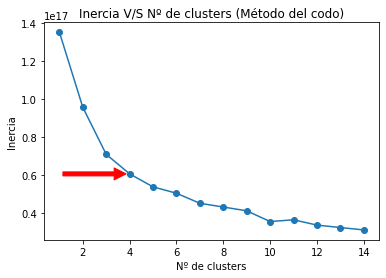

In [8]:
from kneed import KneeLocator

# Calcular la inercia para diferentes números de clusters
inercia = []
for i in range(1, 15):  # Rango de clusters
    modelo = KMeans(n_clusters=i, random_state=0)
    modelo.fit(monopoly)
    inercia.append(modelo.inertia_)

# Utilizar la biblioteca kneed para encontrar el "codo" de forma automática
kl = KneeLocator(range(1, 15), inercia, curve='convex', direction='decreasing')
codo_idx = kl.elbow

# Graficar la inercia
plt.plot(range(1, 15), inercia, marker='o')
plt.title('Inercia V/S Nº de clusters (Método del codo)')
plt.xlabel('Nº de clusters')
plt.ylabel('Inercia')

# Añadir ubicacion del codo
plt.annotate('', xy=(codo_idx, inercia[codo_idx-1]),
             xytext=(codo_idx - 3, inercia[codo_idx-1] + 500),
             arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05))

plt.show()

Se busca el número óptimo de clousters graficando la inercia como función del número de clusters y luego utilizando el método del codo. Esto resulta en la elección de 4 clusters como el número óptimo.

#### ➡️MODEL 1 | **K-Means**

1️⃣ - `Definición de variables:`

In [29]:

X = monopoly[['FacDebCom_avg','Fac_avg']].values

Se selecciona como variables $X$ FacDebCom (promedio anual de montos facturados en compras con TD), Fac_avg (promedio anual de montos facturados en compras con TC)

2️⃣ - `Modelo:`

In [30]:
KModel_1 = KMeans(n_clusters= 4, random_state=0)

Se genera el modelo con 4 clusters.

3️⃣ - `Predicción:`

In [31]:
Y_hat = KModel_1.fit_predict(X)

Se ajusta el modelo a $X$ y genera la predicción $\hat{Y}$

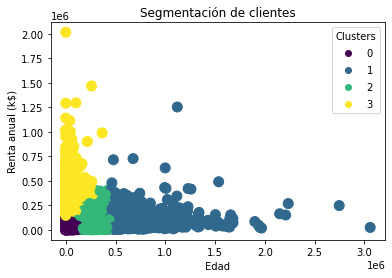

In [32]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0].get(), X[:, 1].get(), c=Y_hat.get(), cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Renta anual (k$)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

Se genera un gráfico de distribución en el que se segmentan los clusters a partir de la renta, por lo que tenemos cuatro grupos divididos por renta.

4️⃣ - `Evaluación:`

In [33]:
from sklearn.metrics import silhouette_score
kmSS_1 = silhouette_score(X.get(), Y_hat.get())

print("Silhouette Score:",kmSS_1)

Silhouette Score: 0.563300591963585


Se mide el promedio de coeficiente de silueta de todas las muestras. Esto nos indica que tan definidos estan los grupos (menor superposición entre clusters). En este caso el valor es de aproximadamente 0.55, por lo que no es un modelo muy optimo considerando un mínimo posible de 0 y máximo de 1.

#### ➡️MODEL 2 | **K-Means**

1️⃣ - `Definición de variables:`

In [34]:
from cuml.preprocessing import StandardScaler

X = monopoly[['FacDebCom_avg','Fac_avg']].values
X = StandardScaler().fit_transform(X)

Se selecciona como variables $X$ FacDebCom (promedio anual de montos facturados en compras con TD), Fac_avg (promedio anual de montos facturados en compras con TC). luego se normalizan.

2️⃣ - `Modelo:`

In [35]:
KModel_2 = KMeans(n_clusters= 3, random_state=0, tol=0.5)

Se genera un segundo modelo con 4 clusters

3️⃣ - `Predicción:`

In [36]:
Y_hat = KModel_2.fit_predict(X)

Se ajusta el modelo a $X$ y se hace una predicción $\hat{Y}$

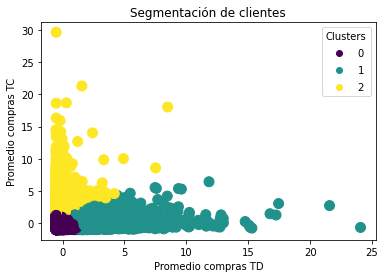

In [37]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0].get(), X[:, 1].get(), c=Y_hat.get(), cmap='viridis', s=100)
plt.xlabel('Promedio compras TD')
plt.ylabel('Promedio compras TC')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

Se grafica la dispersión de Cupo_c1 por edad, similar al modelo anterior, se dividen los clusters por el valor del eje $y$

4️⃣ - `Evaluación:`

In [38]:
from sklearn.metrics import silhouette_score
kmSS_2 = silhouette_score(X.get(), Y_hat.get())

print("Silhouette Score:",kmSS_2)

Silhouette Score: 0.6197361314334143


Se mide el promedio de coeficiente de silueta de todas las muestras. El valor es un poco mayor al modelo 1, pero sigen siendo clusters poco definidos.

#### ➡️MODEL 3 | **K-Means**

1️⃣ - `Definición de variables:`

In [39]:
from cuml.preprocessing import StandardScaler

X = monopoly[['FacDebCom_avg','Fac_avg']].values
X = StandardScaler().fit_transform(X)

Se selecciona como variables $X$ FacDebCom (promedio anual de montos facturados en compras con TD), Fac_avg (promedio anual de montos facturados en compras con TC). luego se normalizan.

2️⃣ - `Modelo:`

In [40]:
from cuml.model_selection import GridSearchCV
from cuml.cluster import KMeans
from sklearn.metrics import silhouette_score
# Define el espacio de búsqueda de hiperparámetros, incluyendo otros hiperparámetros además de n_clusters e init
param_grid = {
    'n_clusters': [3, 4, 5],
    'max_iter': [100, 200, 300, 400],
    'tol': [0.00001, 0.001, 0.1, 0.5, 1]
}

# Crea un modelo K-Means
modelo = KMeans()

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=silhouette_score, n_jobs=1)
grid_search.fit(X)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

best_n_clusters = grid_search.best_params_['n_clusters']
best_max_iter = grid_search.best_params_['max_iter']
best_tol = grid_search.best_params_['tol']

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(f"Número de clústeres (n_clusters): {best_n_clusters}")
print(f'Maximum number of iterations for each run (max_iter): {best_max_iter}')
print(f'Tolerance (tol): {best_tol}')

Mejores hiperparámetros encontrados:
Número de clústeres (n_clusters): 3
Maximum number of iterations for each run (max_iter): 100
Tolerance (tol): 1e-05


In [41]:
KModel_3 = KMeans(**best_params, random_state=0)

Se genera un tercer modelo con 4 clusters.

3️⃣ - `Predicción:`

In [42]:
Y_hat = KModel_3.fit_predict(X)

Se ajusta el modelo a $X$ y se hace una predicción $\hat{Y}$

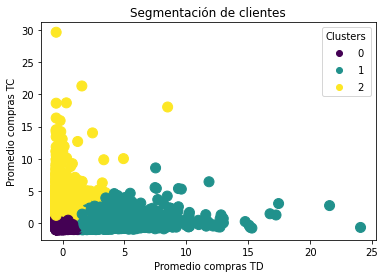

In [43]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0].get(), X[:, 1].get(), c=Y_hat.get(), cmap='viridis', s=100)
plt.xlabel('Promedio compras TD')
plt.ylabel('Promedio compras TC')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

Al igual que en los modelos anteriores se genera una segmentación a partir de una sola variable.

4️⃣ - `Evaluación:`

In [44]:
kmSS_3 = silhouette_score(X.get(), Y_hat.get())

print("Silhouette Score:",kmSS_3)

Silhouette Score: 0.5924410536458458


Se mide el promedio de coeficiente de silueta de todas las muestras. El coeficiente es muy similar al anterior, siendo mayor en el modelo 2 con una diferecia de aproximadamente $4*10^{-7}$

#### ➡️MODEL 4 | **K-Means**

1️⃣ - `Definición de variables:`

In [101]:
from cuml.preprocessing import StandardScaler

X = monopoly[['FacCN_avg', 'FacPAT_avg']].values
X = StandardScaler().fit_transform(X)

Se define $X$ a partir de FacCN_avg y FacPAT_avg.

2️⃣ - `Modelo:`

In [102]:
from cuml.cluster import KMeans
KModel_4 = KMeans(n_clusters= 4, random_state=0)
Y_hat = KModel_4.fit_predict(X)

Se crea un pipeline con normalización usando standard scaler y nuevo modelo con 4 clusters

3️⃣ - `Predicción:`

Se ajusta el modelo a $X$ y se hace una predicción $\hat{Y}$

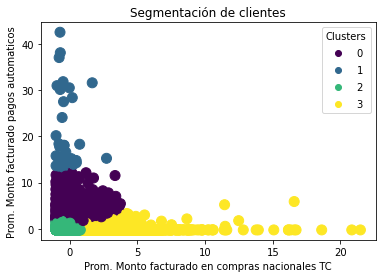

In [103]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0].get(), X[:, 1].get(), c=Y_hat.get(), cmap='viridis', s=100)
plt.xlabel('Prom. Monto facturado en compras nacionales TC')
plt.ylabel('Prom. Monto facturado pagos automaticos')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

Se distingen 4 clusters, el cluster número 1 son principalmente clientes con alto gasto en pagos automáticos y bajo gasto en compras nacionales con TC. El cluster 0 tiene clientes con un gasto medio con pagos automáticos. El cluster 2 tiene clientes con bajo gasto en pagos automático y compras nacionales con TC, por último están los clienes con bajo gasto en pagos automáticos y alto y mediano gasto en copras nacionales con TC.

4️⃣ - `Evaluación:`

In [104]:
from sklearn.metrics import silhouette_score

kmSS_4 = silhouette_score(X.get(), Y_hat.get())

print("Silhouette Score:",kmSS_4)

Silhouette Score: 0.6725334379217525


Se obtiene un modelo mejor que los anteriores, con menos superposición entre clusters.

#### ➡️MODEL 5 | **K-Means**

1️⃣ - `Def hiperparametros:`

In [24]:
from cuml.model_selection import GridSearchCV
# Define el espacio de búsqueda de hiperparámetros, incluyendo otros hiperparámetros además de n_clusters e init
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2, 1, 5]
}

# Crea un modelo K-Means
modelo = KMeans()

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=silhouette_score, n_jobs=1)
grid_search.fit(X)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

best_n_clusters = grid_search.best_params_['n_clusters']
best_max_iter = grid_search.best_params_['max_iter']
best_tol = grid_search.best_params_['tol']

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(f"Número de clústeres (n_clusters): {best_n_clusters}")
print(f'Maximum number of iterations for each run (max_iter): {best_max_iter}')
print(f'Tolerance (tol): {best_tol}')

Mejores hiperparámetros encontrados:
Número de clústeres (n_clusters): 3
Maximum number of iterations for each run (max_iter): 100
Tolerance (tol): 0.0001


Se realiza una búsqueda de hiperparámetros utilizando Silhuette score como medida para puntuar los modelos.

2️⃣ - `Modelo:`

In [25]:
# Crea un modelo con los mejores hiperparámetros
KModel_5 = KMeans(**best_params, random_state=0)

Se genera un quinto modelo con los hiperparámetros resultantes de la busqueda.

3️⃣ - `Predicción:`

In [26]:
Y_hat = KModel_5.fit_predict(X)

Se ajusta el modelo a $X$ y se hace una predicción $\hat{Y}$

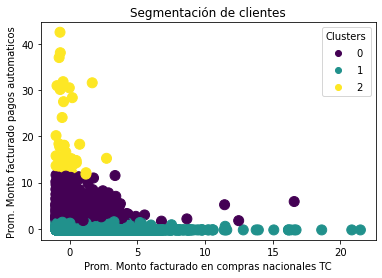

In [27]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0].get(), X[:, 1].get(), c=Y_hat.get(), cmap='viridis', s=100)
plt.xlabel('Prom. Monto facturado en compras nacionales TC')
plt.ylabel('Prom. Monto facturado pagos automaticos')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

Se genera un gráfico de dispersión colorizado para mostrar los clusters. Se los clusters se segmentan a partir del valor del promedio de monto facturado por pagos automáticos, por lo que el modeno no es muy útil para la segmentación de clientes.

4️⃣ - `Evaluación:`

In [28]:
kmSS_5 = silhouette_score(X.get(), Y_hat.get())

print("Silhouette Score:", kmSS_5)

Silhouette Score: 0.7354332270184939


Se obtiene un Silhuette Score aproiximado de 0.73, es el mejor puntaje de los modelos de kmeans en este punto, pero carece de utilidad al segmentar solo considenrando el valor de promedio de monto facturado por pagos automáticos.

#### ✅Winner MODEL | **K-Means**

In [105]:
# Almacenando los resultados en una lista
scores = [kmSS_1, kmSS_2, kmSS_3, kmSS_4, kmSS_5]

# Creando el DataFrame con los resultados
tabla = cudf.DataFrame({'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
                      'Silhouette Score': scores})

print(tabla)

     Modelo  Silhouette Score
0  Modelo 1          0.563301
1  Modelo 2          0.619736
2  Modelo 3          0.592441
3  Modelo 4          0.672533
4  Modelo 5          0.735433


Comparando el promedio del coeficiente de silueta de los samples de cada modelo, destaca el modelo 5 como el modelo con clusters más definidos, para este modelo se utilizó busqueda de hiperparámetros y las variables Edad y Cupo_MX

In [106]:
import joblib

joblib.dump({KModel_4}, 'Kmeans_M4.pkl')

['Kmeans_M4.pkl']

Se guarda el modelo serializado.